In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv('diabetes_balanced_dataset.csv')

In [ ]:
data.shape

(183000, 9)

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,44.0,0,0,never,23.51,5.7,155,1
1,Female,44.0,0,0,never,37.20,5.7,145,0
2,Male,80.0,1,0,former,27.32,4.0,100,0
3,Male,64.0,0,0,former,26.97,5.7,200,1
4,Male,19.0,0,0,never,37.54,4.5,160,0


# Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183000 entries, 0 to 182999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               183000 non-null  object 
 1   age                  183000 non-null  float64
 2   hypertension         183000 non-null  int64  
 3   heart_disease        183000 non-null  int64  
 4   smoking_history      183000 non-null  object 
 5   bmi                  183000 non-null  float64
 6   HbA1c_level          183000 non-null  float64
 7   blood_glucose_level  183000 non-null  int64  
 8   diabetes             183000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 12.6+ MB


In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,183000.000000,183000.00000,183000.000000,183000.000000,183000.000000,183000.000000,183000.000000
mean,50.506746,0.15423,0.089432,29.457722,6.165816,163.504874,0.500000
std,21.522080,0.36117,0.285367,7.466507,1.280889,56.964845,0.500001
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,36.000000,0.00000,0.000000,25.790000,5.700000,130.000000,0.000000
50%,54.000000,0.00000,0.000000,27.320000,6.100000,155.000000,0.500000
75%,67.000000,0.00000,0.000000,32.870000,6.600000,200.000000,1.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Cleaning Data

Cleaning data from null data, duplicates and outlier data

### Check missing value

In [ ]:
data_null = data.isnull().sum()
print(data_null)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


### Handling duplicates

In [ ]:
data_duplicated = data[data.duplicated()]
data_duplicated

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
193,Male,50.0,0,0,never,30.59,8.8,145,1
222,Female,73.0,0,0,former,31.89,6.2,220,1
264,Female,80.0,1,1,never,25.43,6.2,220,1
278,Male,48.0,0,0,No Info,27.32,8.2,159,1
340,Female,67.0,0,0,former,27.32,8.8,126,1
...,...,...,...,...,...,...,...,...,...
182995,Female,69.0,0,0,never,35.38,6.2,130,1
182996,Male,48.0,1,0,former,40.54,5.7,159,1
182997,Female,78.0,1,0,never,25.31,6.2,145,1
182998,Male,76.0,0,0,former,33.07,6.2,240,1


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(96146, 9)

### check for outliers in each column

<Axes: xlabel='age'>

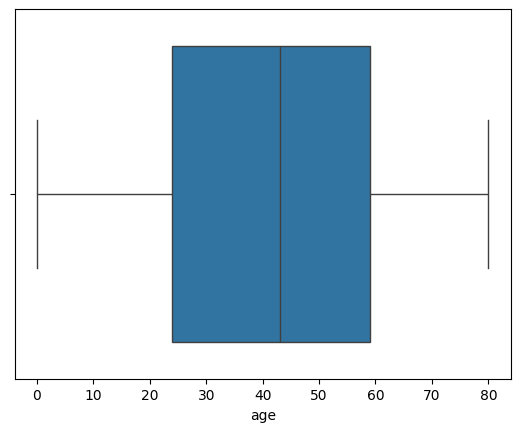

In [ ]:
sns.boxplot(x=data.age)

<Axes: xlabel='bmi'>

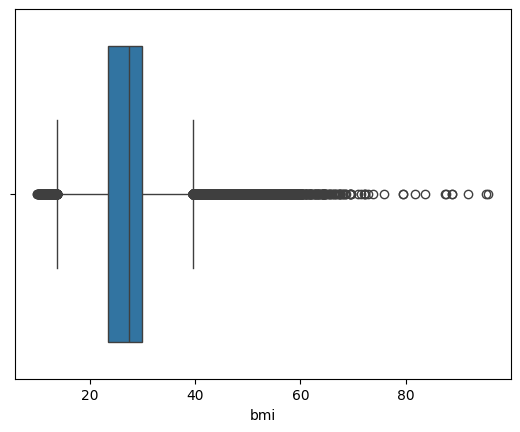

In [ ]:
sns.boxplot(x=data.bmi)

Outlier data in BMI data can be caused by the large number of people who are obese

<Axes: xlabel='HbA1c_level'>

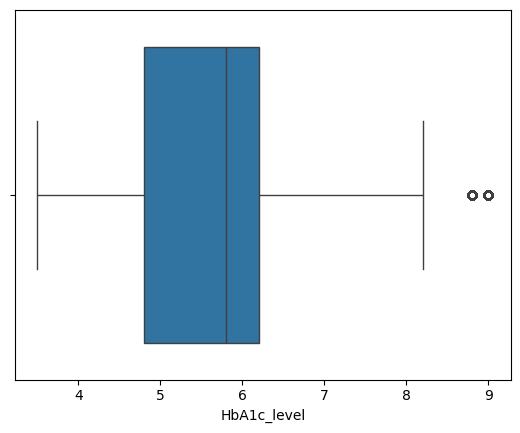

In [ ]:
sns.boxplot(x=data.HbA1c_level)

<Axes: xlabel='blood_glucose_level'>

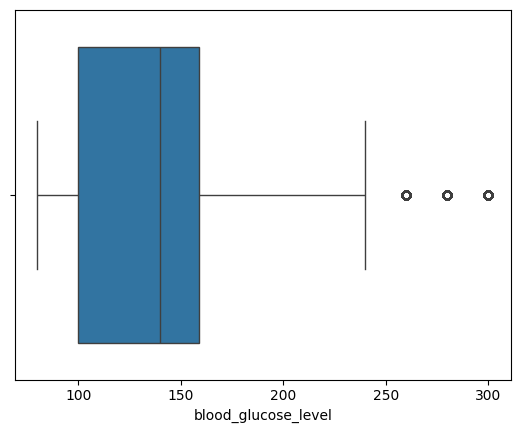

In [ ]:
sns.boxplot(x=data.blood_glucose_level)

Univariate Analysis

Analyze data in a single column section to gain insight from the data.

In [ ]:
numerical_features = ['age','bmi','HbA1c_level','blood_glucose_level']
categorical_features = ['gender','hypertension','heart_disease','smoking_history']

###Categorical features

        no. of sample  percentage
gender                           
Female         102032        55.8
Male            80950        44.2
Other              18         0.0


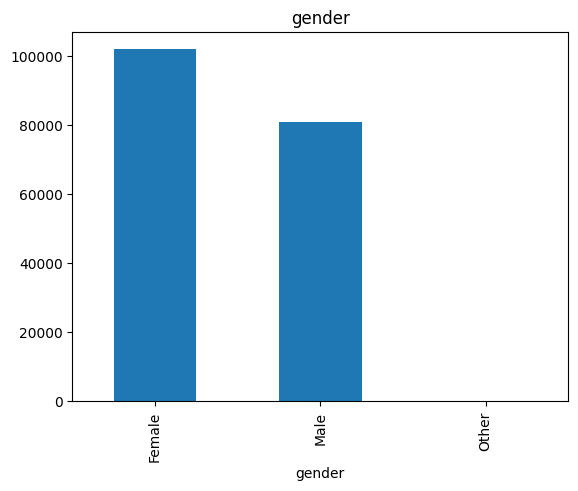

In [ ]:
## feature gender
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'no. of sample':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [ ]:
data = data[data['gender'] != 'Other']

              no. of sample  percentage
hypertension                           
0                    154776        84.6
1                     28224        15.4


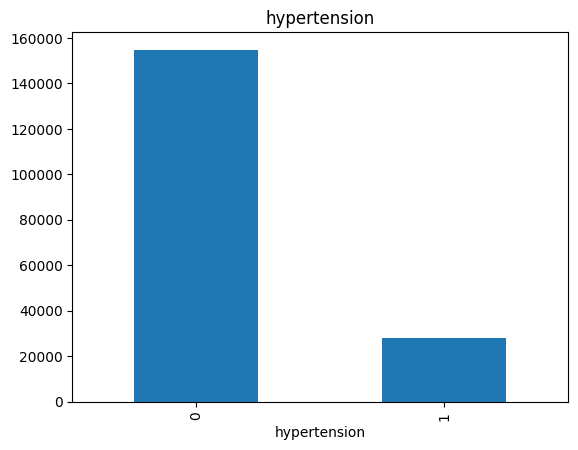

In [ ]:
## feature hypertension
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'no. of sample':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

               no. of sample  percentage
heart_disease                           
0                     166634        91.1
1                      16366         8.9


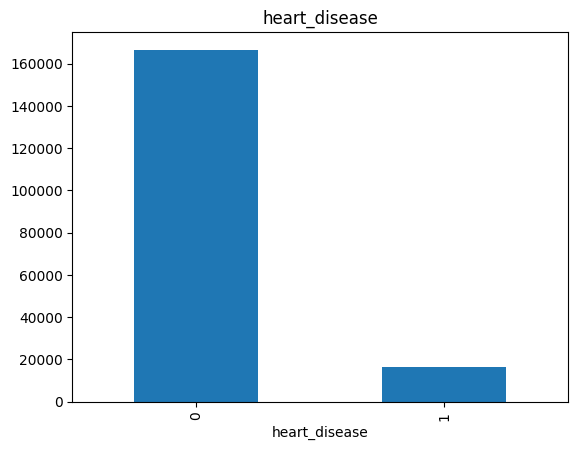

In [ ]:
## feature heart disase
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'no. of sample':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                 no. of sample  percentage
smoking_history                           
never                    67742        37.0
No Info                  50017        27.3
former                   24756        13.5
current                  18652        10.2
not current              13184         7.2
ever                      8631         4.7


<ipython-input-95-32183d1472e5>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(count))  # Generate distinct colors using 'tab20' colormap


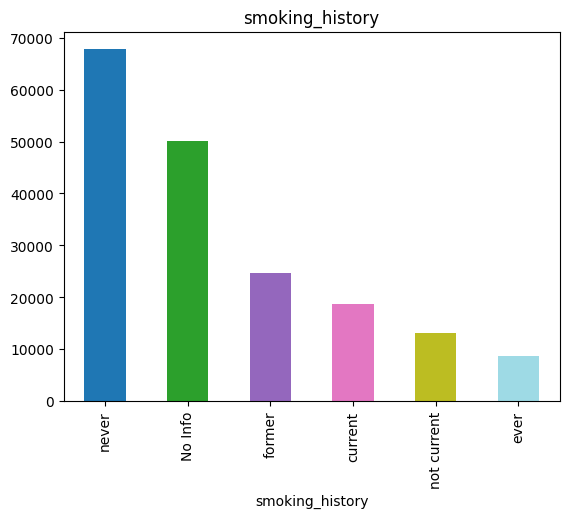

In [ ]:
import matplotlib.pyplot as plt

# Feature and Dataframe setup
feature = categorical_features[3]
count = data[feature].value_counts()
percent = 100 * data[feature].value_counts(normalize=True)
df = pd.DataFrame({'no. of sample': count, 'percentage': percent.round(1)})

# Print the DataFrame
print(df)

# Plotting
colors = plt.cm.get_cmap('tab20', len(count))  # Generate distinct colors using 'tab20' colormap
count.plot(kind='bar', title=feature, color=colors(range(len(count))))

# Show the plot
plt.show()


          no. of sample  percentage
diabetes                           
1                 91500        50.0
0                 91500        50.0


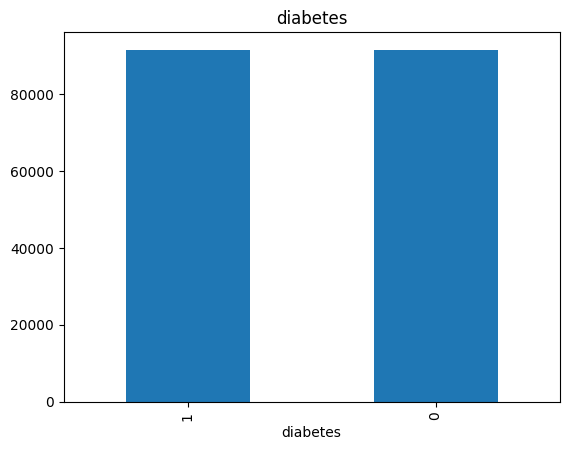

In [ ]:
# diabetes
feature = 'diabetes'
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'no. of sample':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Numerical features

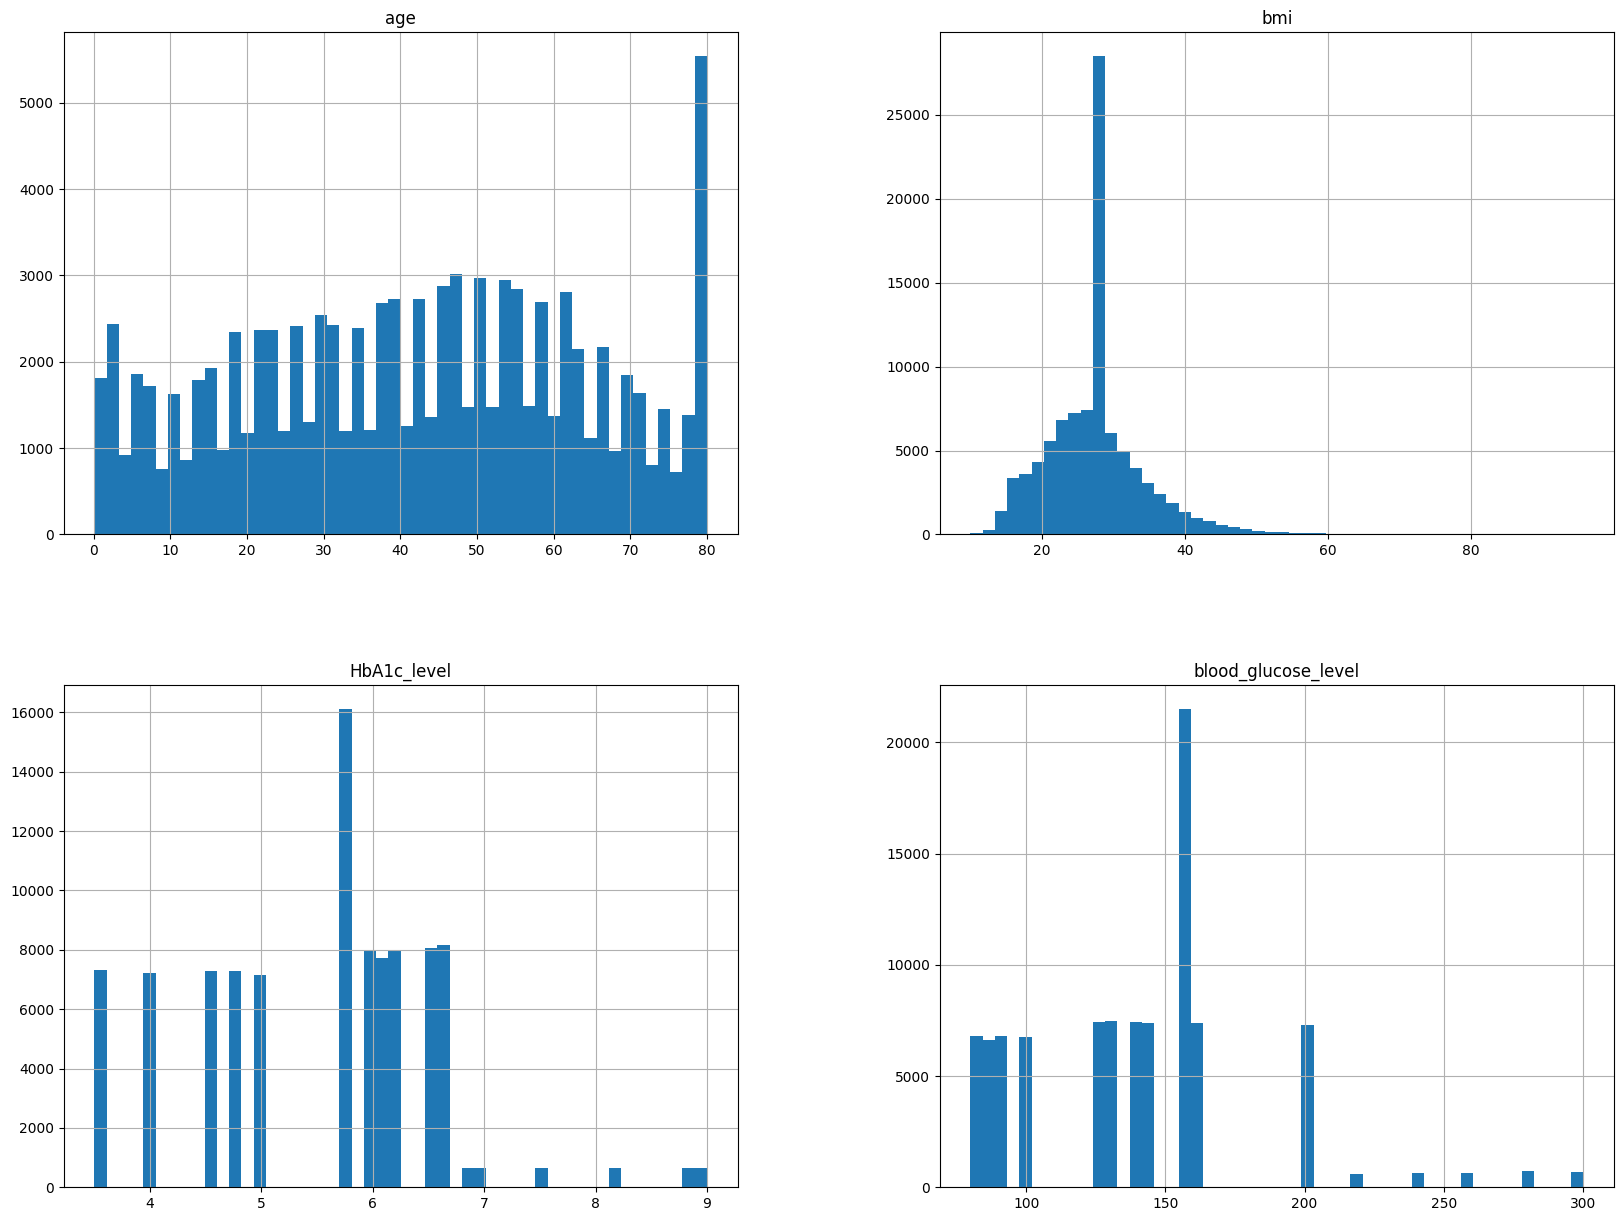

In [ ]:
data[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

Correlation between existing variables and the risk of developing diabetes

### Categorical features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_stats(feature, label_rotation=False, horizontal_layout=True):
    temp = data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})

    # Calculate the percentage of diabetes=1 per category value
    cat_perc = data[[feature, 'diabetes']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='diabetes', ascending=False, inplace=True)

    # Define a custom dark color palette with yellow instead of red
    unique_categories = len(df1)
    palette = sns.color_palette(["#0077b6", "#f4a261", "#d1495b", "#3a0ca3", "#f72585"], unique_categories)  # Blue, Yellow, Dark Pink, Dark Purple, Magenta

    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 14))

    # Bar plot for the number of contracts with distinct dark colors
    s = sns.barplot(ax=ax1, x=feature, y="Number of contracts", data=df1, palette=palette)
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    # Bar plot for the percentage of diabetes=1 with distinct dark colors
    s = sns.barplot(ax=ax2, x=feature, y='diabetes', order=cat_perc[feature], data=cat_perc, palette=palette)
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    plt.ylabel('Percent of diabetes with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()


<ipython-input-122-516a362387ec>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s = sns.barplot(ax=ax1, x=feature, y="Number of contracts", data=df1, palette=palette)
<ipython-input-122-516a362387ec>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s = sns.barplot(ax=ax2, x=feature, y='diabetes', order=cat_perc[feature], data=cat_perc, palette=palette)


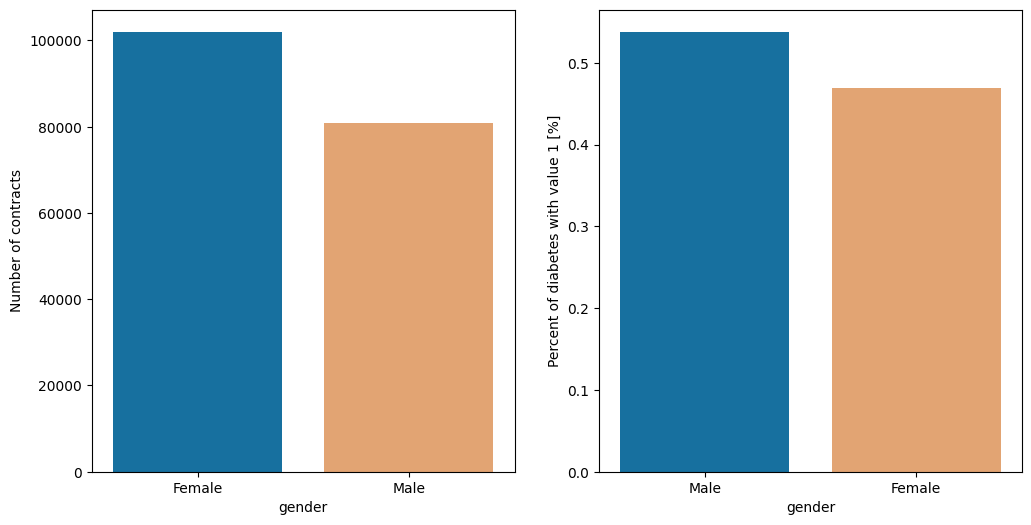

In [ ]:
plot_stats('gender')

Men have a higher risk of developing diabetes than women by 0.2%

<ipython-input-122-516a362387ec>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s = sns.barplot(ax=ax1, x=feature, y="Number of contracts", data=df1, palette=palette)
<ipython-input-122-516a362387ec>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s = sns.barplot(ax=ax2, x=feature, y='diabetes', order=cat_perc[feature], data=cat_perc, palette=palette)


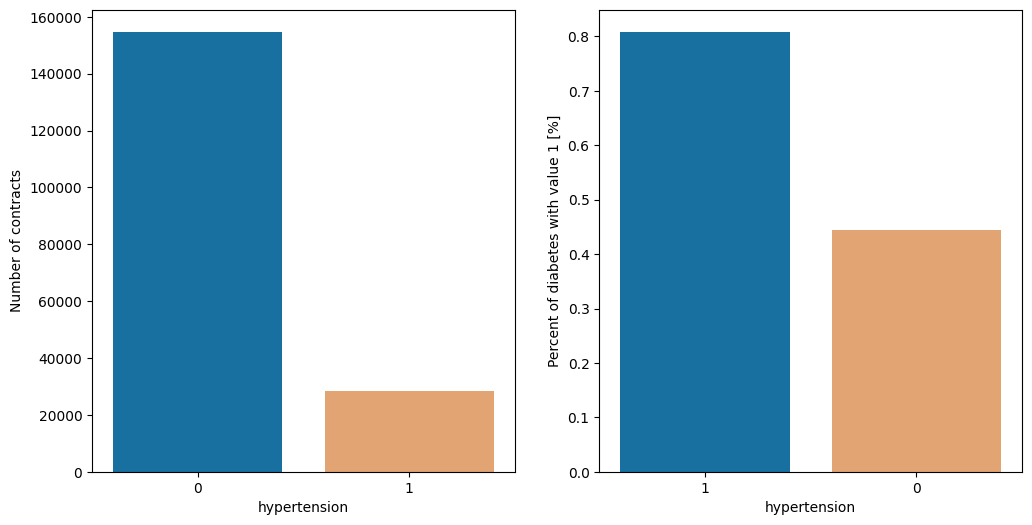

In [ ]:
plot_stats('hypertension')

People with high blood pressure have a risk of developing diabetes of more than 20% compared to those who do not have high blood pressure.

<ipython-input-122-516a362387ec>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s = sns.barplot(ax=ax1, x=feature, y="Number of contracts", data=df1, palette=palette)
<ipython-input-122-516a362387ec>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s = sns.barplot(ax=ax2, x=feature, y='diabetes', order=cat_perc[feature], data=cat_perc, palette=palette)


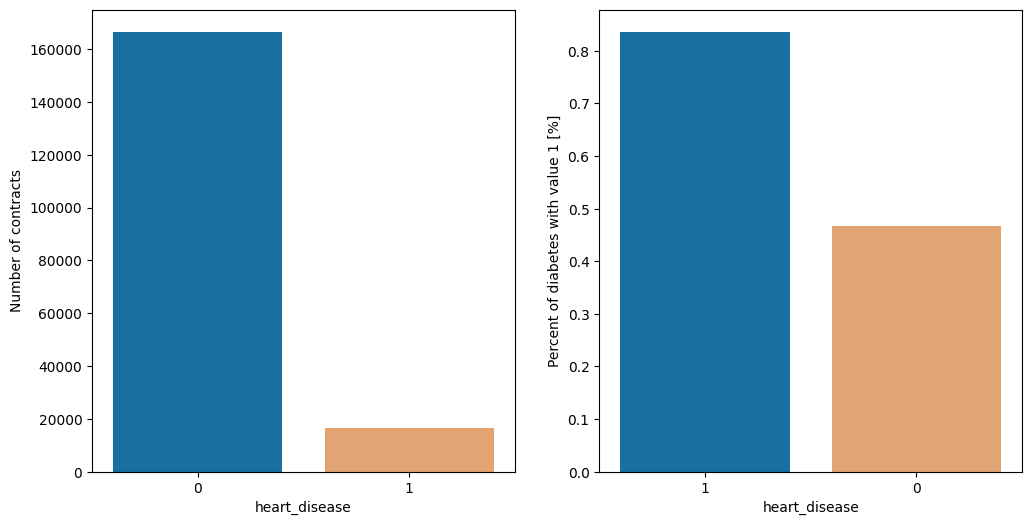

In [ ]:
plot_stats('heart_disease')

Medical history such as heart disease, high blood pressure has a risk of 0.27% - 0.32% of getting diabetes.

<ipython-input-122-516a362387ec>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s = sns.barplot(ax=ax1, x=feature, y="Number of contracts", data=df1, palette=palette)
<ipython-input-122-516a362387ec>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s = sns.barplot(ax=ax2, x=feature, y='diabetes', order=cat_perc[feature], data=cat_perc, palette=palette)


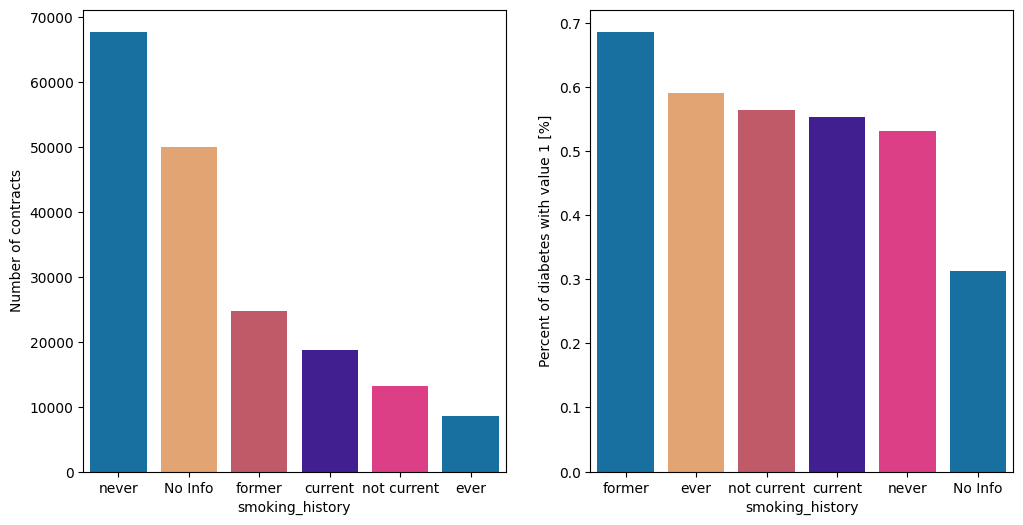

In [ ]:
plot_stats('smoking_history')

Smoking can also increase the risk of developing diabetes, such as former smokers having a risk of 0.17%

###Numerical features

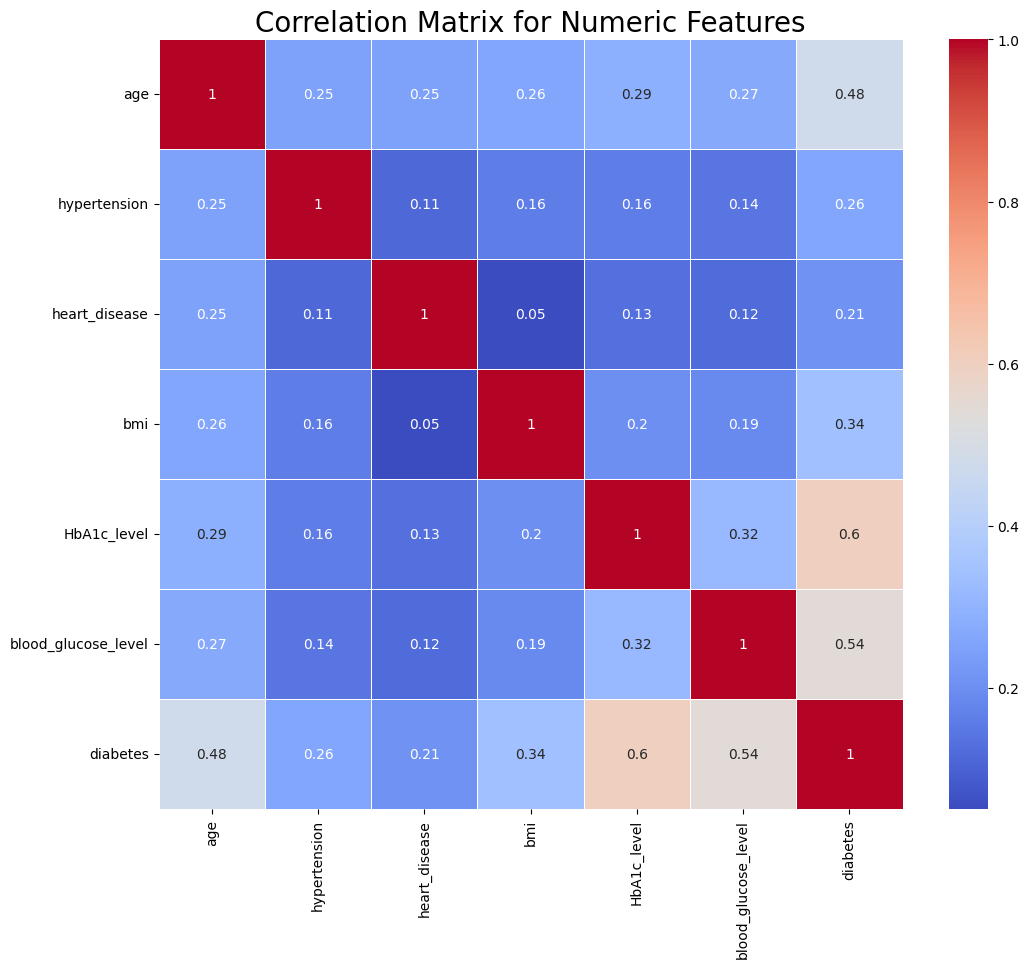

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
data = pd.read_csv('diabetes_balanced_dataset.csv')

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjusted figure size for better readability
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Numeric Features", size=20)
plt.show()


HbA1c_level and blood glucose level have a high correlation with the risk of diabetes as much as 53% - 54%

# Data preparation

Prepare data for the train process. Categorical data that has more than 2 unique values ​​will be Encoded and data that has 2 unique values ​​will be label encoded.

## Encoding Categorical Feature

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,44.0,0,0,never,23.51,5.7,155,1
1,Female,44.0,0,0,never,37.20,5.7,145,0
2,Male,80.0,1,0,former,27.32,4.0,100,0
3,Male,64.0,0,0,former,26.97,5.7,200,1
4,Male,19.0,0,0,never,37.54,4.5,160,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender_encoded'] = label_encoder.fit_transform(data['gender'])

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
data = pd.concat([data, pd.get_dummies(data['smoking_history'], prefix='smoking_history')],axis=1)
data.drop(['gender','smoking_history'], axis=1, inplace=True)
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Gender_encoded,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,44.0,0,0,23.51,5.7,155,1,0,False,False,False,False,True,False
1,44.0,0,0,37.20,5.7,145,0,0,False,False,False,False,True,False
2,80.0,1,0,27.32,4.0,100,0,1,False,False,False,True,False,False
3,64.0,0,0,26.97,5.7,200,1,1,False,False,False,True,False,False
4,19.0,0,0,37.54,4.5,160,0,1,False,False,False,False,True,False


## Train test split

Divide the data into train and test, for the test data 10% of the total data is taken

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(["diabetes"],axis =1)
y = data["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
print(f'Total sample in whole dataset: {len(X)}')
print(f'Total sample in train dataset: {len(X_train)}')
print(f'Total sample in test dataset: {len(X_test)}')

Total sample in whole dataset: 183000
Total sample in train dataset: 164700
Total sample in test dataset: 18300


## standardization

Perform data scaling using the standard scaler with the aim of saving computation and improving model performance.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age,bmi,HbA1c_level,blood_glucose_level
108211,1.370400,-0.285933,-0.911417,-1.466810
31408,-1.231056,1.445574,0.337920,-1.115624
42820,-0.534237,0.239822,0.025586,-1.379014
61878,1.045218,1.468374,0.494087,1.342679
86452,-0.534237,1.849279,-1.692253,-0.588845


#Modelling

Using 3 Machine learning models, KNN Random Forest and Boosting Algorithm

## K-Nearest Neighbor

In [ ]:
# Prepare Dataframe for model analysis
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random forest

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor

# create a prediction model
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Boosting algorithm

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

MSE evaluation matrix

Calculate model performance using MSE

In [ ]:
# Create an mse variable whose contents are a dataframe of the mse values ​​of the train and test data for each algorithm.
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

#Create a dictionary for each algorithm used.
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Calculate the Mean Squared Error of each algorithm on the train and test data.
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3


mse

,train,test
KNN,0.000032,0.00004
RF,0.000031,0.000034
Boosting,0.000103,0.000103


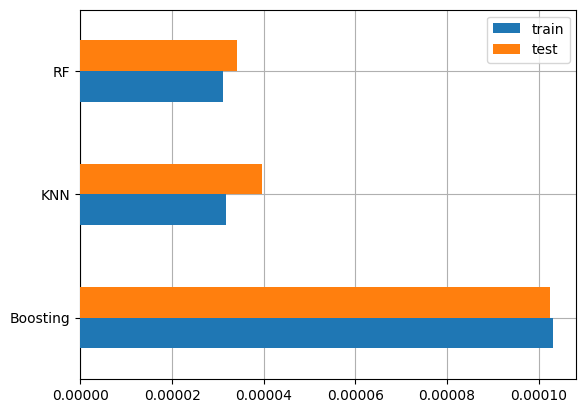

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## ROC-AUC Evaluation matrix

Calculating model performance using ROC-AUC curve

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
y_pred_knn = knn.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_knn)
print(f'KNN AUC-ROC Score: {roc_auc:.4f}')

KNN AUC-ROC Score: 0.9853


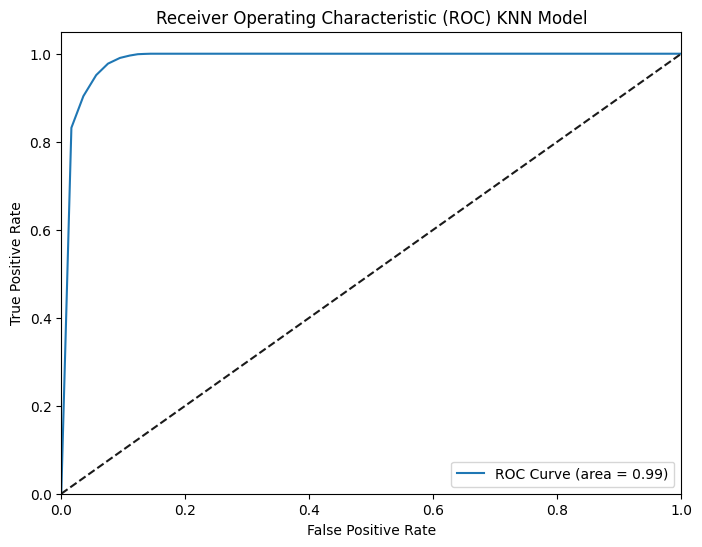

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) KNN Model')
plt.legend(loc='lower right')
plt.show()


In [ ]:
y_pred_RF = RF.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_RF)
print(f'RF AUC-ROC Score: {roc_auc:.4f}')

RF AUC-ROC Score: 0.9937


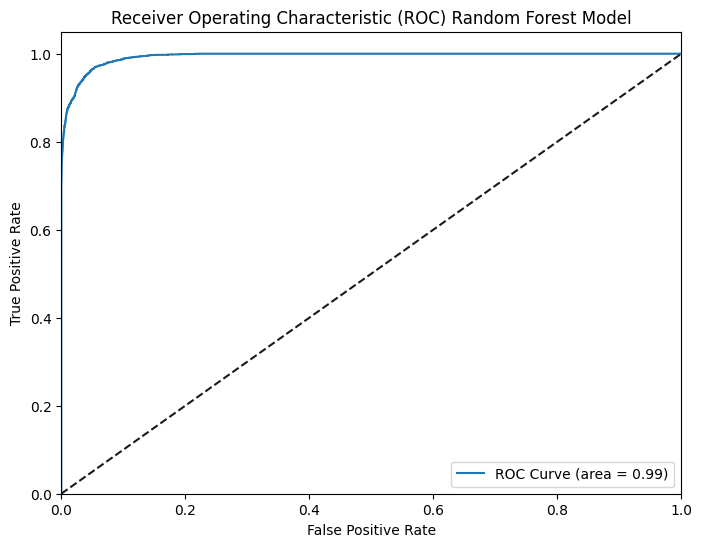

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Random Forest Model')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred_boost = boosting.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_boost)
print(f'Boost AUC-ROC Score: {roc_auc:.4f}')

Boost AUC-ROC Score: 0.9597


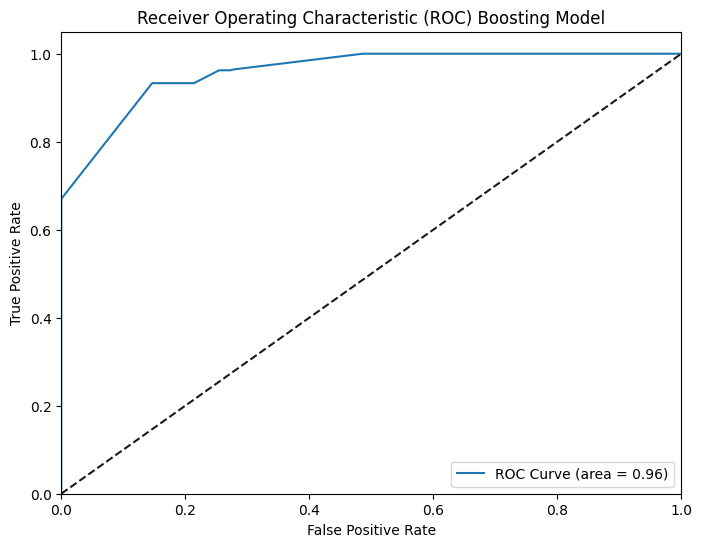

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_boost)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Boosting Model')
plt.legend(loc='lower right')
plt.show()

## Prediction test

In [ ]:
prediction = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediction_'+name] = model.predict(prediction).round(1)

pd.DataFrame(pred_dict)

,y_true,prediction_KNN,prediction_RF,prediction_Boosting
180328,0,0.0,0.0,0.0


Tab Transformer Results

Epoch 1/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.8601 - loss: 0.3006 - val_accuracy: 0.8967 - val_loss: 0.2231
Epoch 2/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8957 - loss: 0.2212 - val_accuracy: 0.8993 - val_loss: 0.2028
Epoch 3/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8998 - loss: 0.2082 - val_accuracy: 0.9045 - val_loss: 0.1975
Epoch 4/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9021 - loss: 0.2035 - val_accuracy: 0.9046 - val_loss: 0.1922
Epoch 5/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9026 - loss: 0.2021 - val_accuracy: 0.9060 - val_loss: 0.1932
Epoch 6/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9031 - loss: 0.2005 - val_accuracy: 0.9035 - val_loss: 0.1983
Epoch 7/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9044 - loss: 0.1997 - val_accuracy: 0.9051 - val_loss: 0.1910
Epoch 8/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9043 - loss: 0.1977 - val_accuracy: 

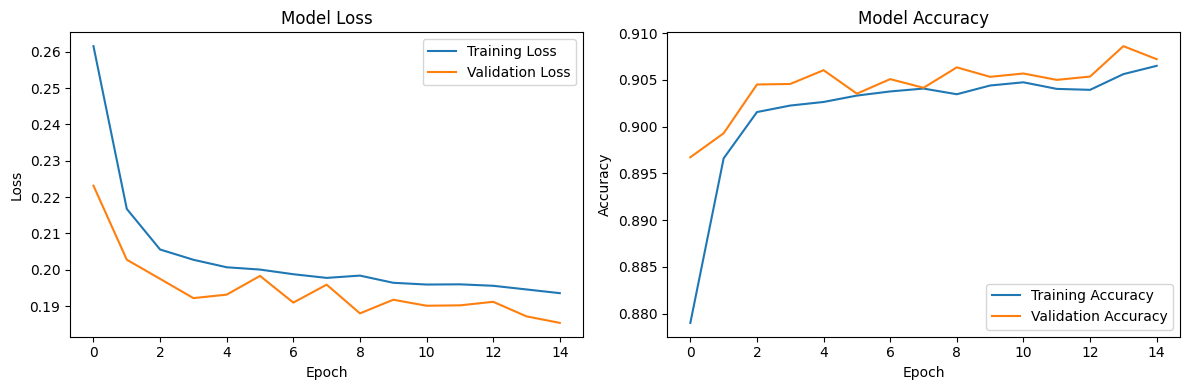

In [1]:
import keras
from keras import layers
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define dataset metadata and hyperparameters
NUMERIC_FEATURES = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
CATEGORICAL_FEATURES = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
TARGET_FEATURE = 'diabetes'

# Model hyperparameters
EMBEDDING_DIMS = 16
NUM_TRANSFORMER_BLOCKS = 3
NUM_HEADS = 4
DROPOUT_RATE = 0.2
MLP_HIDDEN_UNITS_FACTORS = [2, 1]
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001
BATCH_SIZE = 256
NUM_EPOCHS = 15

def create_model_inputs(numeric_features, categorical_features):
    inputs = {}
    # Numeric features
    for feature in numeric_features:
        inputs[feature] = layers.Input(name=feature, shape=(1,), dtype='float32')
    # Categorical features - change dtype to int32 since categorical values are already encoded
    for feature in categorical_features:
        inputs[feature] = layers.Input(name=feature, shape=(1,), dtype='int32')
    return inputs

def create_tabtransformer():
    # Create inputs
    inputs = create_model_inputs(NUMERIC_FEATURES, CATEGORICAL_FEATURES)

    # Process categorical features
    categorical_embeddings = []
    for feature in CATEGORICAL_FEATURES:
        # Updated vocabulary sizes for each categorical feature
        vocab_sizes = {
            'gender': 3,  # Female/Male/Other
            'hypertension': 2,  # 0/1
            'heart_disease': 2,  # 0/1
            'smoking_history': 6  # never/current/former/not current/ever/No Info
        }

        # Create embedding layer with known vocabulary size
        embedding = layers.Embedding(
            input_dim=vocab_sizes[feature],
            output_dim=EMBEDDING_DIMS,
            name=f'embedding_{feature}'
        )
        x = embedding(inputs[feature])
        categorical_embeddings.append(x)

    # Stack categorical embeddings
    categorical_features = layers.concatenate(categorical_embeddings, axis=1)

    # Process numeric features
    numeric_features = layers.concatenate([inputs[f] for f in NUMERIC_FEATURES])
    numeric_features = layers.BatchNormalization()(numeric_features)

    # Transformer blocks
    for _ in range(NUM_TRANSFORMER_BLOCKS):
        # Multi-head attention
        attention_output = layers.MultiHeadAttention(
            num_heads=NUM_HEADS,
            key_dim=EMBEDDING_DIMS,
            dropout=DROPOUT_RATE
        )(categorical_features, categorical_features)

        # Add & normalize
        x = layers.Add()([attention_output, categorical_features])
        x = layers.LayerNormalization(epsilon=1e-6)(x)

        # Feedforward
        ffn = layers.Dense(EMBEDDING_DIMS * 4, activation='gelu')(x)
        ffn = layers.Dropout(DROPOUT_RATE)(ffn)
        ffn = layers.Dense(EMBEDDING_DIMS)(ffn)

        # Add & normalize
        categorical_features = layers.Add()([ffn, x])
        categorical_features = layers.LayerNormalization(epsilon=1e-6)(categorical_features)

    # Flatten and concatenate with numeric features
    categorical_features = layers.Flatten()(categorical_features)
    features = layers.concatenate([categorical_features, numeric_features])

    # Final MLP layers
    for factor in MLP_HIDDEN_UNITS_FACTORS:
        units = max(int(factor * features.shape[-1]), 32)
        features = layers.Dense(units, activation='gelu')(features)
        features = layers.Dropout(DROPOUT_RATE)(features)
        features = layers.BatchNormalization()(features)

    # Output layer
    outputs = layers.Dense(1, activation='sigmoid')(features)

    # Create and compile model
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=keras.optimizers.AdamW(learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

def preprocess_data(data):
    # Split features and target
    X = data.drop(columns=TARGET_FEATURE)
    y = data[TARGET_FEATURE]

    # Scale numeric features
    scaler = StandardScaler()
    X[NUMERIC_FEATURES] = scaler.fit_transform(X[NUMERIC_FEATURES])

    # Ensure categorical features are integers
    for feature in CATEGORICAL_FEATURES:
        if feature == 'smoking_history':
            # Updated mapping for smoking history categories
            smoking_map = {
                'never': 0,
                'current': 1,
                'former': 2,
                'not current': 3,
                'ever': 4,
                'No Info': 5
            }
            X[feature] = X[feature].map(smoking_map).fillna(5)  # Use 5 for any unknown categories
        elif feature == 'gender':
            # Handle three gender categories
            gender_map = {
                'Female': 0,
                'Male': 1,
                'Other': 2
            }
            X[feature] = X[feature].map(gender_map).fillna(0)  # Default to most common (Female)
        # hypertension and heart_disease are already 0/1

    return X, y

# Add data validation
def validate_data(data):
    """Validate the input data ranges and formats"""
    assert all(data['age'].between(0, 80)), "Age should be between 0 and 80"
    assert all(data['bmi'].between(10, 95.7)), "BMI should be between 10 and 95.7"
    assert all(data['HbA1c_level'].between(3.5, 9)), "HbA1c should be between 3.5 and 9"
    assert all(data['blood_glucose_level'].between(80, 300)), "Blood glucose should be between 80 and 300"

    valid_genders = {'Female', 'Male', 'Other'}
    valid_smoking = {'never', 'current', 'former', 'not current', 'ever', 'No Info'}

    assert all(data['gender'].isin(valid_genders)), "Invalid gender categories found"
    assert all(data['smoking_history'].isin(valid_smoking)), "Invalid smoking history categories found"
    assert all(data['hypertension'].isin([0, 1])), "Hypertension should be 0 or 1"
    assert all(data['heart_disease'].isin([0, 1])), "Heart disease should be 0 or 1"

# Update main execution
if __name__ == "__main__":
    # Load data
    data = pd.read_csv('diabetes_balanced_dataset.csv')

    # Validate data
    validate_data(data)

    # Preprocess data
    X, y = preprocess_data(data)

    # Create and train model
    model = create_tabtransformer()

    # Convert data to dictionary format for keras
    train_dict = {name: X[name].values for name in X.columns}

    # Train model with class weights to handle imbalance
    class_weights = {
        0: 1.0,
        1: len(y[y==0]) / len(y[y==1])  # Adjust weight for minority class
    }

    # Train model
    history = model.fit(
        train_dict,
        y,
        validation_split=0.2,
        epochs=NUM_EPOCHS,
        batch_size=BATCH_SIZE,
        class_weight=class_weights,  # Add class weights
        verbose=1
    )

    # Evaluate model
    val_loss, val_accuracy = model.evaluate(train_dict, y)
    print(f"Validation accuracy: {val_accuracy:.4f}")

    # Plot training history
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()